In [1]:
import sys
import os
sys.path.insert(0, f'{os.getenv("HOME")}/Devel/simgio/PYsimgio/')

import simgio_utils as su
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def define_marker(mu):
    if mu == 10:
        return 'o'
    elif mu == 100:
        return 'v'
    elif mu == 1000:
        return 's'
    else:
        raise(Except(f"mu error! value {mu} not expected!"))

def witer_graphs(df_dict, max_row, max_col, save_to=None):
    
    
    fig, ax = plt.subplots(nrows=max_row, ncols=max_col, figsize=(17, 8))
    
    import matplotlib.markers as mmarkers

    def colors(group_id):
        if group_id == 0:
            return "blue"
        if group_id == 1:
            return 'red'
        elif group_id == 2:
            return 'green'
        elif group_id == 3:
            return 'gold'
        else:
            print(f"outline group_id: {group_id}")
            return 'black'
        
    row = 0
    col = 0

    for key, df in df_dict.items():
        
        # define the marker list
        m = df.mu.apply(lambda x : define_marker(x)).values
        
        # plot the graph
        sub = ax[row,col].scatter(df.witer.values, df.alpha_io.values, 
                            c=df.group_id.apply(lambda x: colors(x)),
                            alpha=0.6)
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
            
        sub.set_paths(paths)
        
        ax[row,col].set_xscale('log')
        
        ax[row, col].set_title(key)
        
        ax[row, col].set_xlabel(r'$w_{iter}$', fontweight='bold', fontsize=14)
        ax[row, col].set_ylabel(r'$\alpha_{io}$', fontsize=14, fontweight='bold')
        col += 1
        if col == max_col:
            col = 0
            row += 1
            
    fig.tight_layout(pad=3.0)
    
    if save_to:
        
        fig.savefig(f'graphs/{save_to}', format='pdf', dpi=1200)
        

    plt.show()

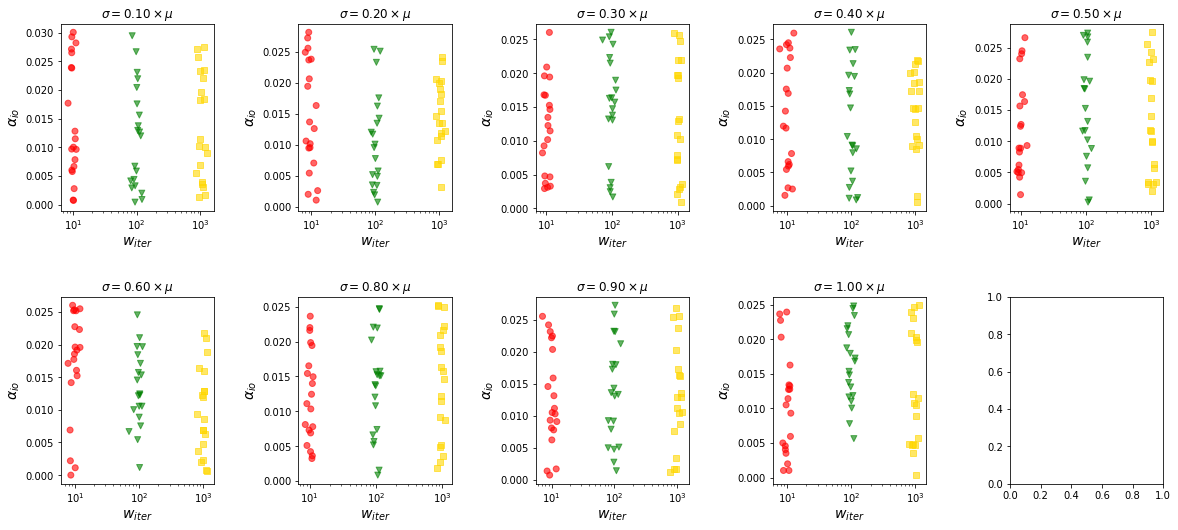

In [3]:
witer_graphs({
    #r"$\sigma=0.05\times \mu$": su.load_app('csv_0.0/app_0.csv'),
              r"$\sigma=0.10\times \mu$": su.load_app('csv_0.100/app_0.csv'),
              r"$\sigma=0.20\times \mu$": su.load_app('csv_0.200/app_0.csv'),
              r"$\sigma=0.30\times \mu$": su.load_app('csv_0.300/app_0.csv'),
              r"$\sigma=0.40\times \mu$": su.load_app('csv_0.400/app_0.csv'),
              r"$\sigma=0.50\times \mu$": su.load_app('csv_0.500/app_0.csv'),
              r"$\sigma=0.60\times \mu$": su.load_app('csv_0.600/app_0.csv'),
              r"$\sigma=0.80\times \mu$": su.load_app('csv_0.800/app_0.csv'),
             r"$\sigma=0.90\times \mu$": su.load_app('csv_0.900/app_0.csv'),
             r"$\sigma=1.00\times \mu$": su.load_app('csv_1.000/app_0.csv')
             },
             max_row = 2,
             max_col = 5)

In [4]:
n_executions = 30
n_tasks = 60
priorities = ['Exclusive-FCFS',
              'FairShare',
              #'Sharing+Priority',
              #'Set-FairShare',
              'Set-10']


In [5]:
#_ , ev0 = su.load_all(priorities=priorities,  n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.0/') 
_ , ev10 = su.load_all(priorities=priorities, n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.100')  
_ , ev20 = su.load_all(priorities=priorities, n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.200')
_ , ev30 = su.load_all(priorities=priorities, n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.300')
_ , ev40 = su.load_all(priorities=priorities, n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.400')
_ , ev50 = su.load_all(priorities=priorities, n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.500')
_ , ev60 = su.load_all(priorities=priorities, n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.600')
_ , ev70 = su.load_all(priorities=priorities, n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.700')
_ , ev80 = su.load_all(priorities=priorities, n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.800')
_ , ev90 = su.load_all(priorities=priorities, n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_0.900')
_ , ev1_00 = su.load_all(priorities=priorities, n_tasks=n_tasks, n_executions=n_executions, csv_folder='csv_1.000')


g = {
    #'0.00': ev0,
    '0.10': ev10,
     '0.20': ev20,
     '0.30': ev30,
     '0.40': ev40,
     '0.50': ev50,
     '0.60': ev60,
     '0.70': ev70,
     '0.80': ev80,
     '0.90': ev90,
     '1.00': ev1_00
    }

In [6]:
def generate_values(sd, priorities):
    values = []
    for priority in priorities:
        values.append(g[sd].groupby('priority').get_group(priority).max_stretch)
        
    return values


   

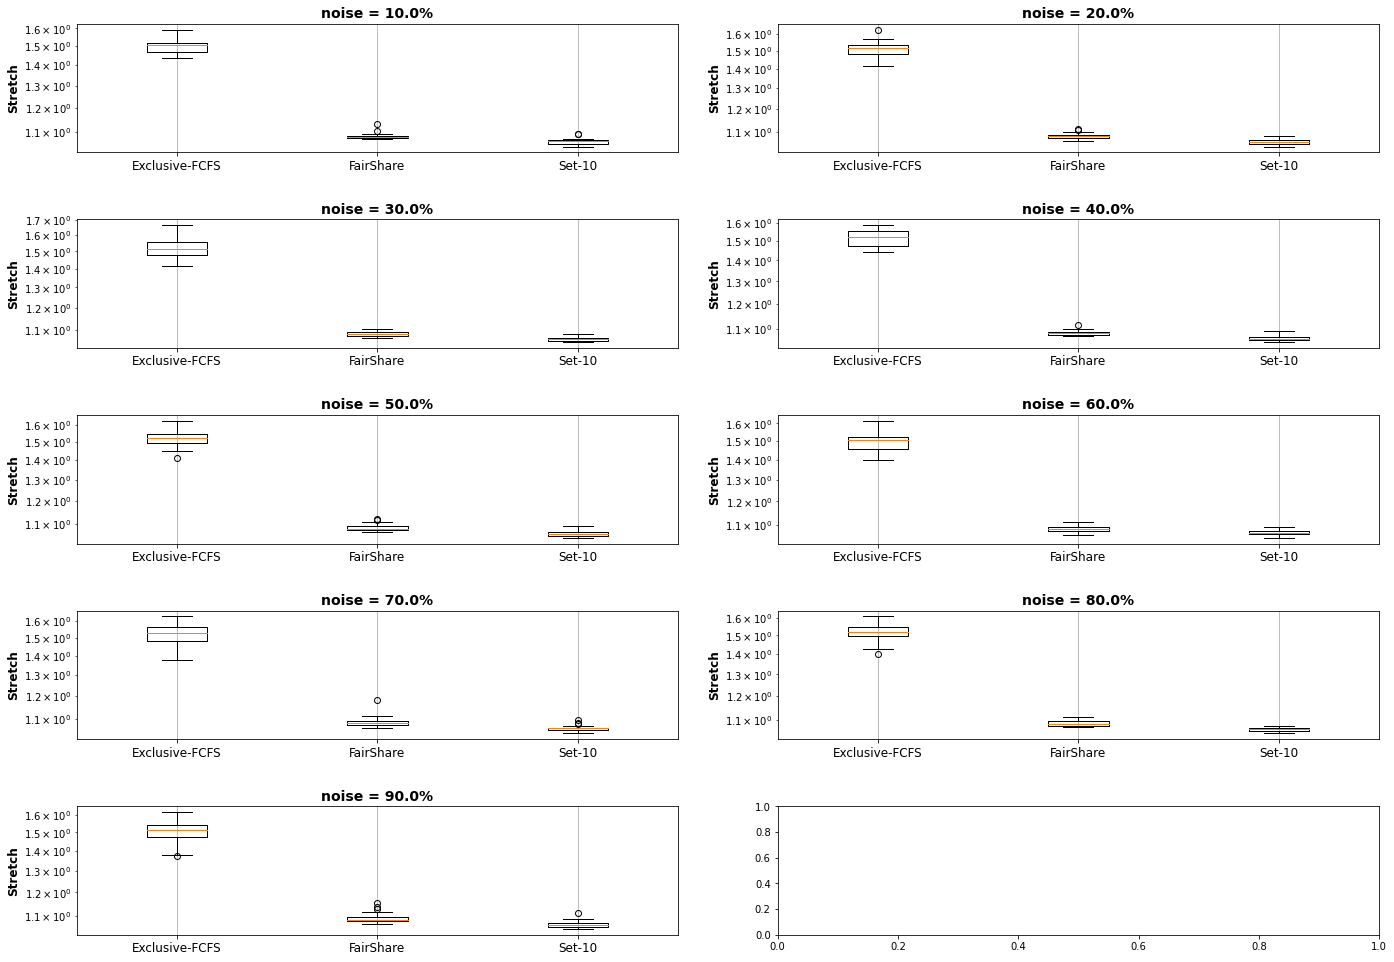

In [7]:
x_values = ['0.10', '0.20', '0.30', '0.40', '0.50', '0.60', '0.70', '0.80', '0.90']

priorities = ['Exclusive-FCFS', 'FairShare', 'Set-10']
xlabels = ['Exclusive-FCFS','FairShare',  'Set-10']


max_rows = 5
max_cols = 2

fig, ax = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20, 14))


row = 0
col = 0 



for x in x_values:
    ax[row, col].boxplot(generate_values(x, priorities))

    ax[row,col].set_yscale('log')        
    ax[row, col].set_title(f'noise = {100* float(x)}%', fontsize=14, fontweight='bold')

    ax[row, col].set_xticklabels(xlabels, fontsize=12)
    ax[row,col].grid()
    
    ax[row, col].set_ylabel(r'Stretch', fontsize=12, fontweight='bold')
    
#     ax[row, col].set_ylim((1.0,1.25))

    col += 1        
    if col == max_cols:
        col = 0
        row += 1 



# plt.grid()

fig.tight_layout(pad=3.0)
# plt.legend()

#     if save_to:
fig.savefig('graphs/boxplot_noise.pdf', format='pdf', dpi=1200)

plt.show()

In [10]:
noise_values =[0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0]





def generate_values(priority):
    mean_values = []
    min_values = []
    max_values = []
    
    ev_list = [ev10, ev20, ev30, ev40, ev50, ev60, ev70, ev80, ev90, ev1_00]
    
    for ev in ev_list:
        mean_values.append(ev.groupby('priority').get_group(priority).utilization.mean())
        min_values.append(ev.groupby('priority').get_group(priority).utilization.min())
        max_values.append(ev.groupby('priority').get_group(priority).utilization.max())
        
    return min_values, mean_values, max_values
          
fairShare_min,fairShare_mean, fairShare_max = generate_values("FairShare")
exclusive_min,exclusive_mean, exclusive_max = generate_values("Exclusive-FCFS")
set10_min,set10_mean, set10_max = generate_values("Set-10")

In [22]:
df = pd.DataFrame()
i = 0
for ev in [ev10, ev20, ev30, ev40, ev50, ev60, ev70, ev80, ev90, ev1_00]:
    ev["noise"] = noise_values[i]
    i+= 1





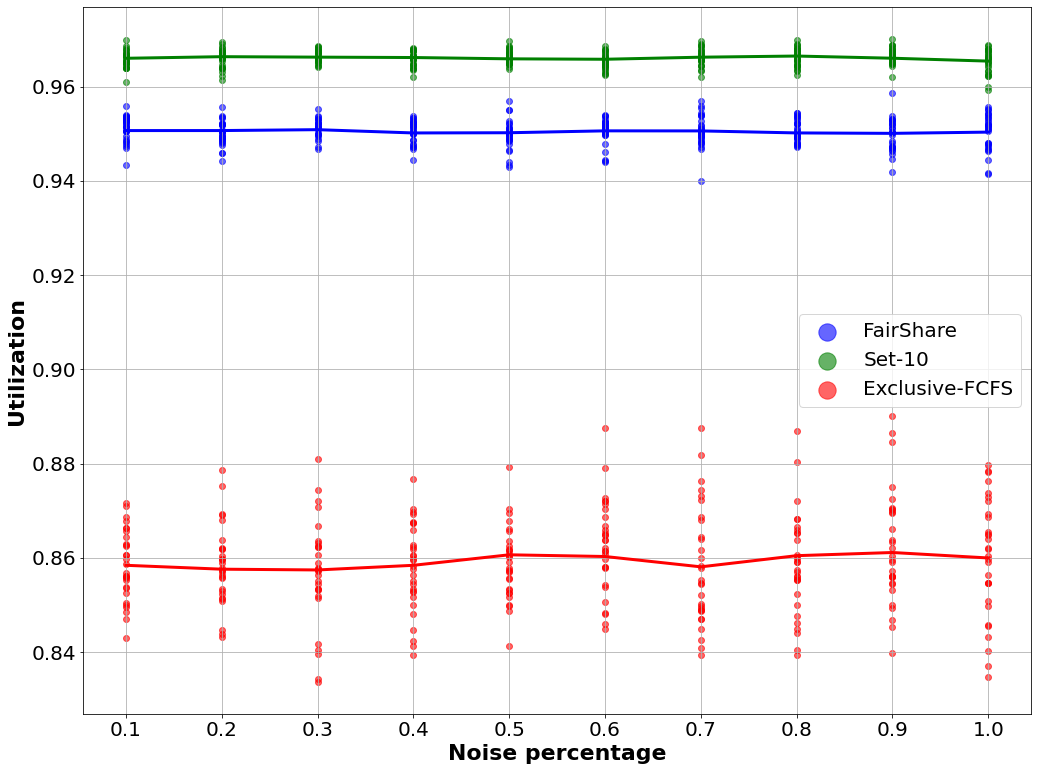

In [35]:
import math

from scipy import stats

fig, ax = plt.subplots(1, figsize=(17, 13))

df_fairshare = df.loc[df.priority == "FairShare"]
df_exclusive = df.loc[df.priority == "Exclusive-FCFS"]
df_set10 = df.loc[df.priority == "Set-10"]

df_all = {
    "FairShare": df_fairshare,
    "Set-10": df_set10,
    "Exclusive-FCFS": df_exclusive
}

colors = ["blue", "green", "red"]

color_index = 0
for key, value in df_all.items():

    ax.scatter(value.noise, value.utilization, color=colors[color_index], alpha=0.6, label=key)
    y_values = []
    for v in noise_values:
        initial = v
        final = v + 0.10
        y_values.append(
            value.loc[(value.noise >= initial) & (value.noise <= final)].utilization.mean()
        )
    ax.plot(noise_values, y_values, color=colors[color_index], linewidth=3)

    color_index += 1


              
plt.ylabel(r'Utilization', fontsize=22, fontweight='bold')
plt.xlabel(r'Noise percentage', fontweight='bold', fontsize=22)

plt.grid()

# ax.set_yscale('log')
lgnd=plt.legend(prop={'size': 20})

lgnd.legendHandles[0]._sizes = [300]
lgnd.legendHandles[1]._sizes = [300]
lgnd.legendHandles[2]._sizes = [300]

ax.set_xticks(noise_values)


# plt.title(title, fontweight='bold', fontsize=18)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

fig.savefig(f"graphs/max_stretch_noise.pdf", format='pdf', dpi=1200)

plt.show()